In [2]:
import pandas as pd
import numpy as np


!pip install s3fs #This line of code need to be executed only during the first run and can be avoided for subsequent runs

#Boto3 is the name of the Python SDK for AWS. It allows you to directly create, update, and delete AWS resources from your Python scripts.
import boto3
client=boto3.client('s3')


path1='s3://projectcheckbucket/region25_en.csv'


frames=pd.read_csv(path1)


Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Using cached botocore-1.28.5-py3-none-any.whl (9.3 MB)
  Attempting uninstall: botocore
    Found existing installation: botocore 1.24.19
    Uninstalling botocore-1.24.19:
      Successfully uninstalled botocore-1.24.19
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.0.1 requires botocore<1.22.9,>=1.22.8, but you have botocore 1.28.5 which is incompatible.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
df = frames

In [4]:
df1=df.copy()
df1.head()

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,parse_date
0,Fiat,124 Spider,open,blue,Gasoline,NaN,8000.0,Automatic,NaN,1830000,NaN,NaN,NaN,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/fiat/124_spider/47...,2022-08-20 04:00:00
1,BMW,i3,hatchback 5 doors,black,Electro,NaN,12000.0,Automatic,NaN,1830000,NaN,NaN,NaN,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/bmw/i3/47958301.html,2022-08-20 04:00:00
2,Mercedes-Benz,GLE Coupe,jeep 5 doors,burgundy,Gasoline,2015.0,57000.0,AT,367.0,4600000,450 AMG 4MATIC Особая серия,M 276 DE 30 AL,3.0 LTR,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/mercedes-benz/gle_...,2022-08-20 04:00:00
3,Mercedes-Benz,G-Class,jeep 5 doors,black,Gasoline,2002.0,200000.0,AT,296.0,2999999,G 500,M 113 E 50,5.0 LTR,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/mercedes-benz/g-cl...,2022-08-20 04:00:00
4,Audi,Q7,jeep 5 doors,white,Gasoline,NaN,67000.0,Automatic,252.0,3300000,NaN,NaN,NaN,2022-08-20 00:00:00,Vladivostok,https://vladivostok.drom.ru/audi/q7/46498184.html,2022-08-20 04:00:00


In [9]:
df.describe()

,year,mileage,power,price
count,1.102226e+06,1.498720e+06,1.492313e+06,1.513200e+06
mean,2.010340e+03,1.342509e+05,1.458111e+02,1.368558e+06
std,7.568868e+00,8.520383e+04,7.008858e+01,1.573677e+06
min,1.943000e+03,1.000000e+03,9.000000e+00,1.500000e+04
25%,2.007000e+03,7.400000e+04,9.900000e+01,5.050000e+05
50%,2.012000e+03,1.240000e+05,1.320000e+02,8.570000e+05
75%,2.016000e+03,1.850000e+05,1.700000e+02,1.685000e+06
max,2.022000e+03,1.000000e+06,1.000000e+03,4.150000e+07


In [5]:
# dropping columns which have Nan Values as seen from above output
df1.drop(columns=['year','vehicleConfiguration','engineName','engineDisplacement','link','parse_date','date','location'],axis=1,inplace=True)
df1

,brand,name,bodyType,color,fuelType,mileage,transmission,power,price
0,Fiat,124 Spider,open,blue,Gasoline,8000.0,Automatic,NaN,1830000
1,BMW,i3,hatchback 5 doors,black,Electro,12000.0,Automatic,NaN,1830000
2,Mercedes-Benz,GLE Coupe,jeep 5 doors,burgundy,Gasoline,57000.0,AT,367.0,4600000
3,Mercedes-Benz,G-Class,jeep 5 doors,black,Gasoline,200000.0,AT,296.0,2999999
4,Audi,Q7,jeep 5 doors,white,Gasoline,67000.0,Automatic,252.0,3300000
...,...,...,...,...,...,...,...,...,...
1513195,Mitsubishi,Pajero,jeep 5 doors,grey,Gasoline,80000.0,AT,245.0,600000
1513196,Daihatsu,Mira e:S,hatchback 5 doors,pink,Gasoline,66000.0,CVT,52.0,430000
1513197,Lexus,GX470,jeep 5 doors,black,Gasoline,170000.0,AT,235.0,1680000
1513198,Nissan,Safari,jeep 5 doors,green,Diesel,313000.0,AT,160.0,999000


In [12]:
df1.isnull().sum()

brand                0
name                 0
bodyType             0
color           109734
fuelType          3560
mileage          14480
transmission      3065
power            20887
price                0
dtype: int64

In [25]:
def plot_sns(column):
    sns.countplot(data=df1,x=column)
    rcParams['figure.figsize'] = 150,120
    plt.show()
    

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
plot_sns('color')

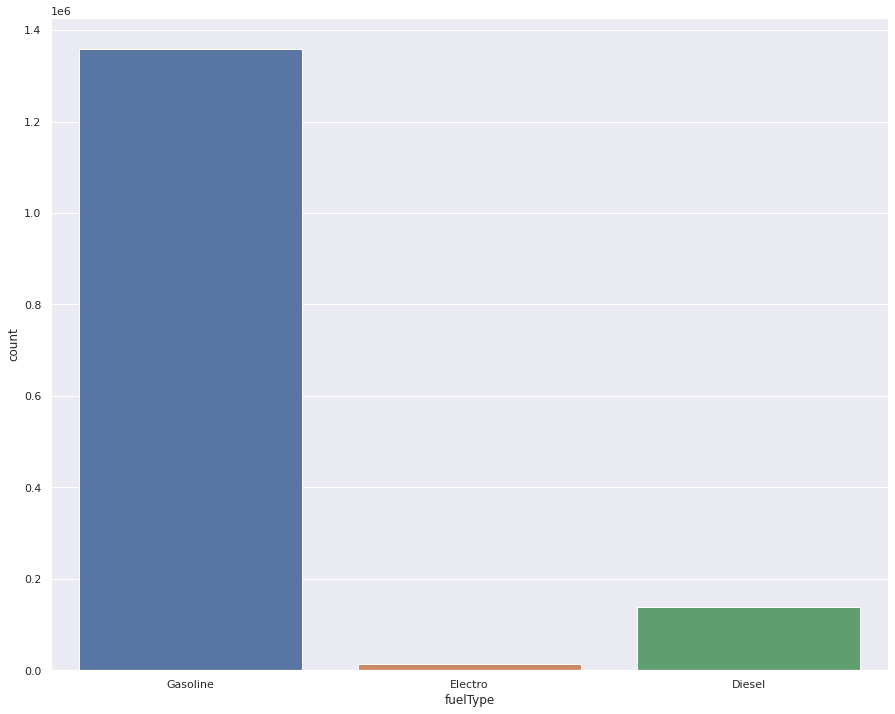

In [27]:
plot_sns('fuelType')

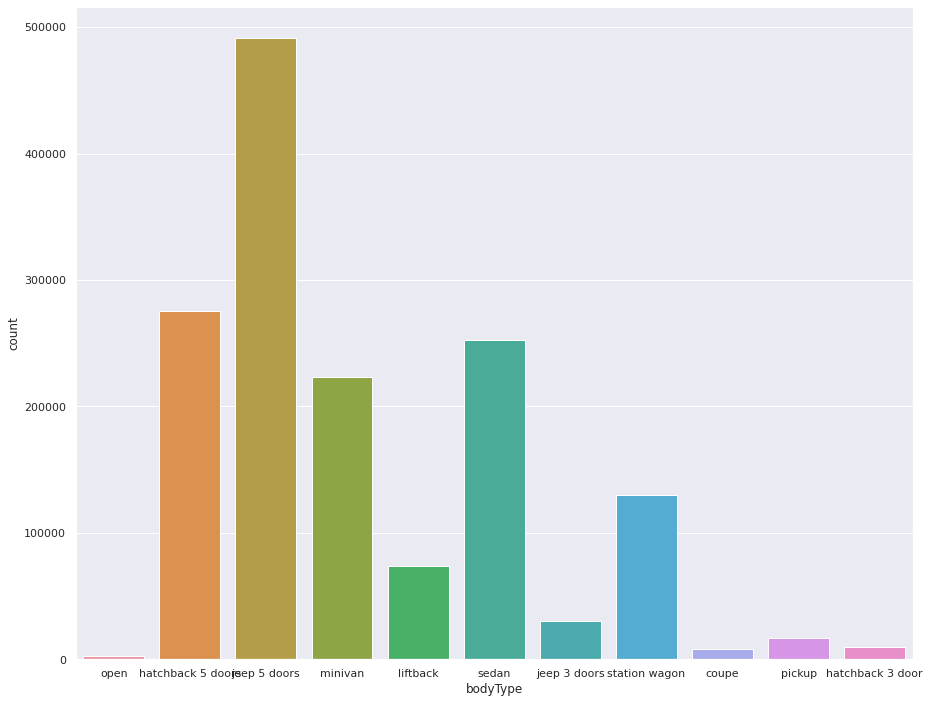

In [28]:
plot_sns('bodyType')

In [31]:
df1.fillna(0)

,brand,name,bodyType,color,fuelType,mileage,transmission,power,price
0,Fiat,124 Spider,open,blue,Gasoline,8000.0,Automatic,0.0,1830000
1,BMW,i3,hatchback 5 doors,black,Electro,12000.0,Automatic,0.0,1830000
2,Mercedes-Benz,GLE Coupe,jeep 5 doors,burgundy,Gasoline,57000.0,AT,367.0,4600000
3,Mercedes-Benz,G-Class,jeep 5 doors,black,Gasoline,200000.0,AT,296.0,2999999
4,Audi,Q7,jeep 5 doors,white,Gasoline,67000.0,Automatic,252.0,3300000
...,...,...,...,...,...,...,...,...,...
1513195,Mitsubishi,Pajero,jeep 5 doors,grey,Gasoline,80000.0,AT,245.0,600000
1513196,Daihatsu,Mira e:S,hatchback 5 doors,pink,Gasoline,66000.0,CVT,52.0,430000
1513197,Lexus,GX470,jeep 5 doors,black,Gasoline,170000.0,AT,235.0,1680000
1513198,Nissan,Safari,jeep 5 doors,green,Diesel,313000.0,AT,160.0,999000


In [35]:
for i in df1.columns:
    
     df1[i].replace(np.nan, 0,inplace=True)
df1

,brand,name,bodyType,color,fuelType,mileage,transmission,power,price
0,Fiat,124 Spider,open,blue,Gasoline,8000.0,Automatic,99.0,1830000
1,BMW,i3,hatchback 5 doors,black,Electro,12000.0,Automatic,99.0,1830000
2,Mercedes-Benz,GLE Coupe,jeep 5 doors,burgundy,Gasoline,57000.0,AT,367.0,4600000
3,Mercedes-Benz,G-Class,jeep 5 doors,black,Gasoline,200000.0,AT,296.0,2999999
4,Audi,Q7,jeep 5 doors,white,Gasoline,67000.0,Automatic,252.0,3300000
...,...,...,...,...,...,...,...,...,...
1513195,Mitsubishi,Pajero,jeep 5 doors,grey,Gasoline,80000.0,AT,245.0,600000
1513196,Daihatsu,Mira e:S,hatchback 5 doors,pink,Gasoline,66000.0,CVT,52.0,430000
1513197,Lexus,GX470,jeep 5 doors,black,Gasoline,170000.0,AT,235.0,1680000
1513198,Nissan,Safari,jeep 5 doors,green,Diesel,313000.0,AT,160.0,999000


In [36]:
df1.isnull().sum()

brand           0
name            0
bodyType        0
color           0
fuelType        0
mileage         0
transmission    0
power           0
price           0
dtype: int64

In [38]:
df2=df1.copy()
df2.head()

,brand,name,bodyType,color,fuelType,mileage,transmission,power,price
0,Fiat,124 Spider,open,blue,Gasoline,8000.0,Automatic,99.0,1830000
1,BMW,i3,hatchback 5 doors,black,Electro,12000.0,Automatic,99.0,1830000
2,Mercedes-Benz,GLE Coupe,jeep 5 doors,burgundy,Gasoline,57000.0,AT,367.0,4600000
3,Mercedes-Benz,G-Class,jeep 5 doors,black,Gasoline,200000.0,AT,296.0,2999999
4,Audi,Q7,jeep 5 doors,white,Gasoline,67000.0,Automatic,252.0,3300000


In [51]:
def get_key_val(column):
    x=df2[column].value_counts().index
    y=df2[column].value_counts().values.tolist()
    return x,y
    

In [52]:
def plot_pie(column):
    palette_color = sns.color_palette('bright')
    x,y = get_key_val(column)
    plt.pie(y,labels = x,colors = palette_color,autopct='%.0f%%')
    plt.show()

In [87]:
def plot_bar(column):
    x,y = get_key_val(column)
    plt.bar(x,y)
    plt.xlabel("label: " + column)
    plt.ylabel("count of label: " + column)
    plt.title("A bar plot wiht key and values")
    plt.show()

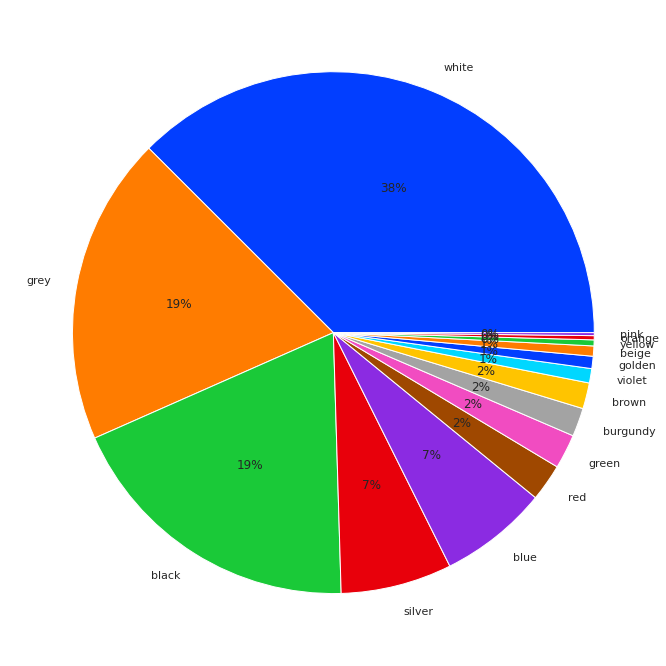

In [72]:
plot_pie('color')

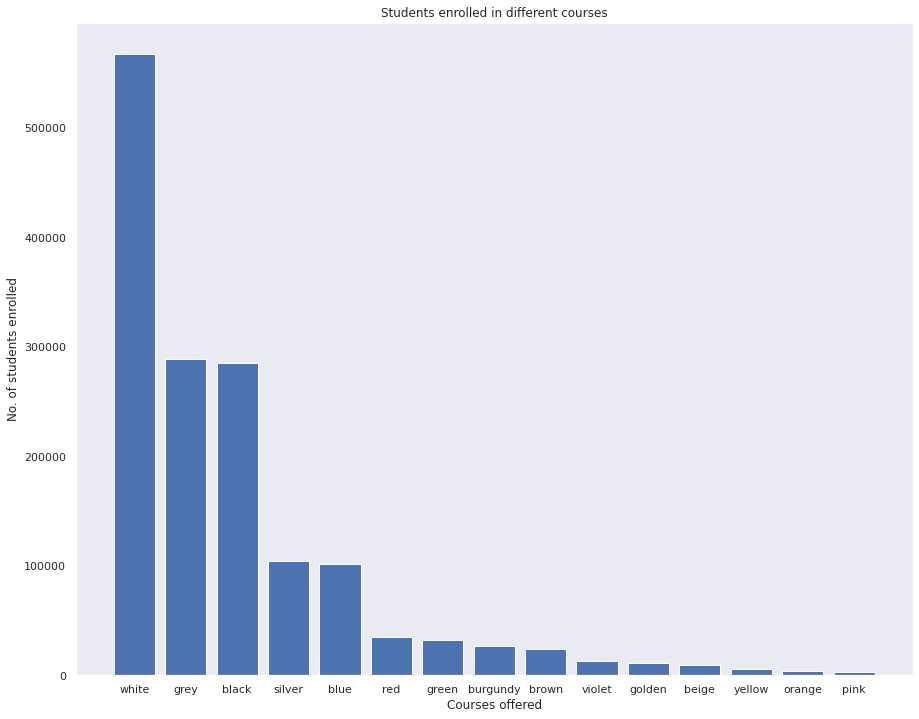

In [73]:
plot_bar('color')

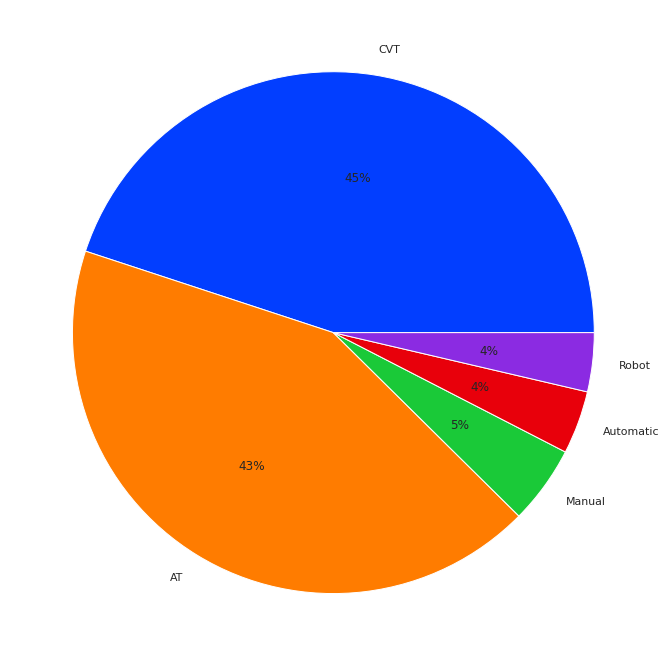

In [74]:
plot_pie('transmission')

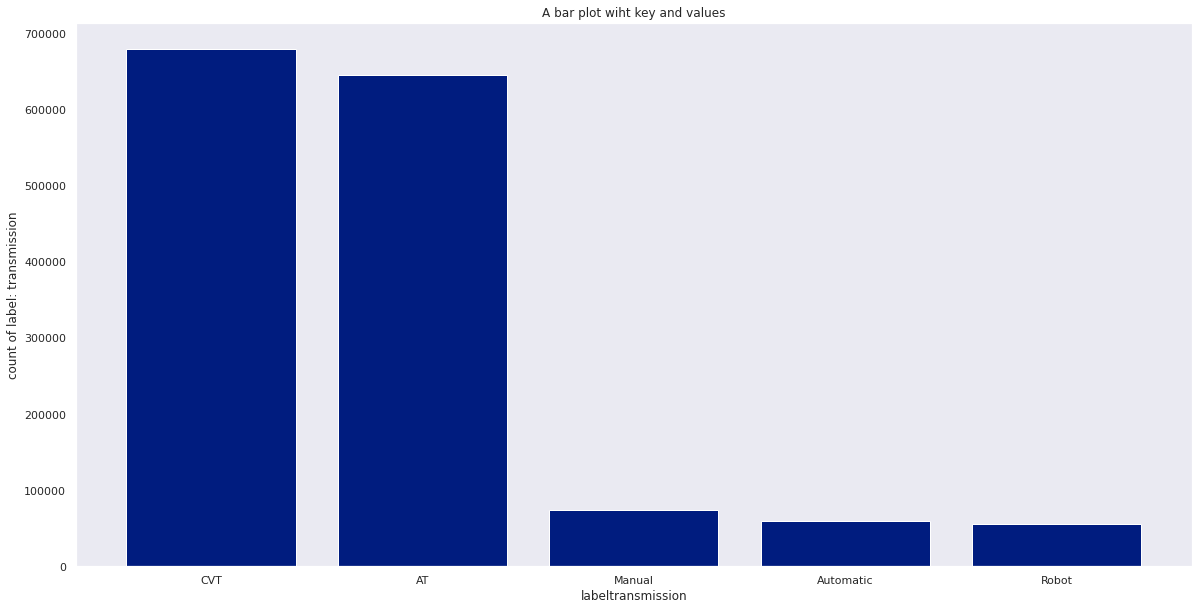

In [86]:
plot_bar('transmission')

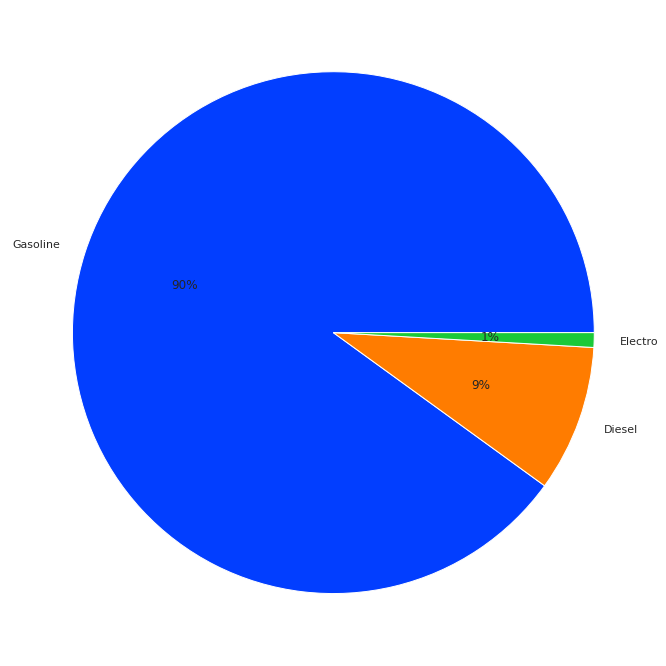

In [76]:
plot_pie('fuelType')

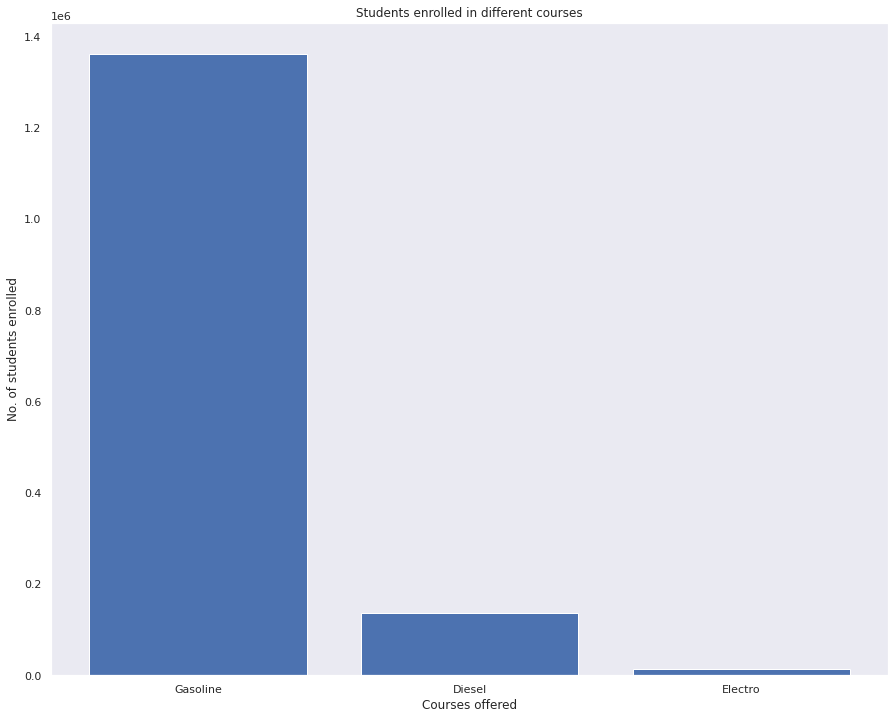

In [77]:
plot_bar('fuelType')

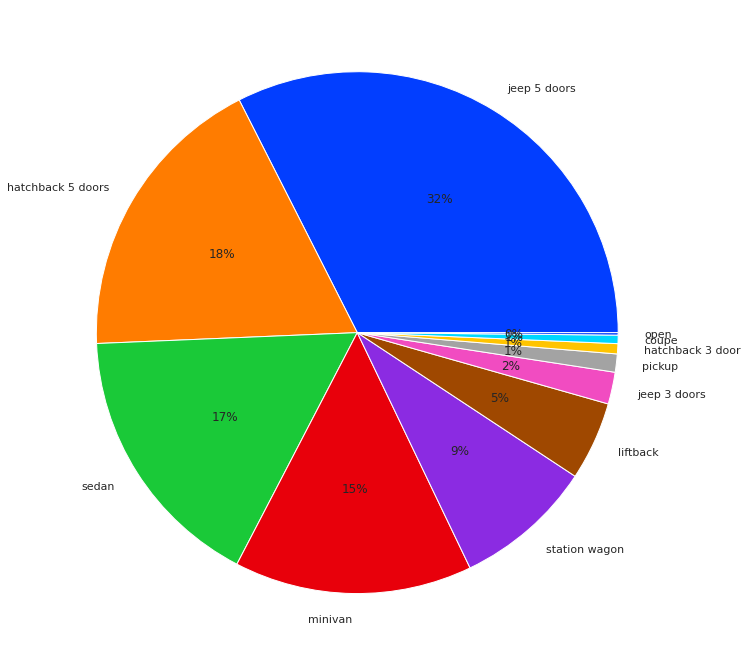

In [78]:
plot_pie('bodyType')

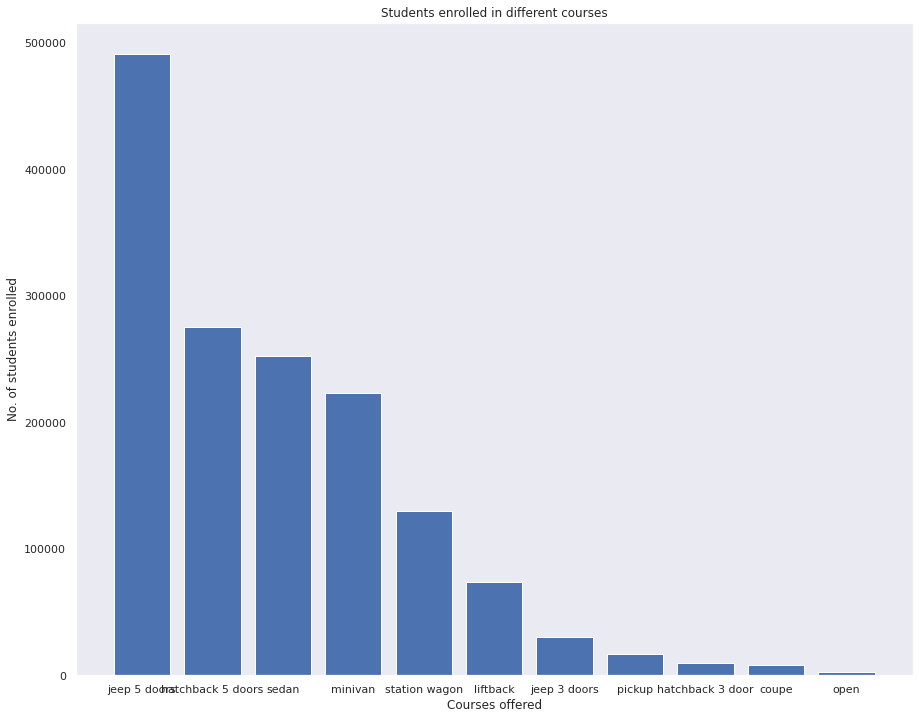

In [79]:
plot_bar('bodyType')

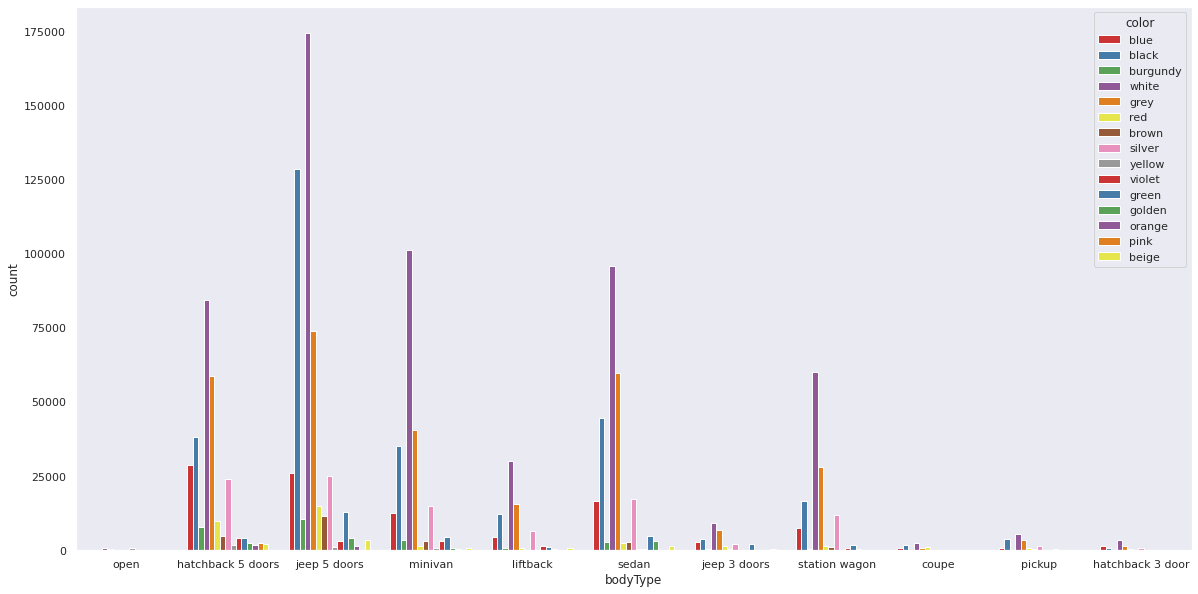

In [83]:
plt.rcParams["figure.figsize"]=[20,10]
sns.countplot(x="bodyType", hue="color", data=df2, palette="Set1")
plt.draw()

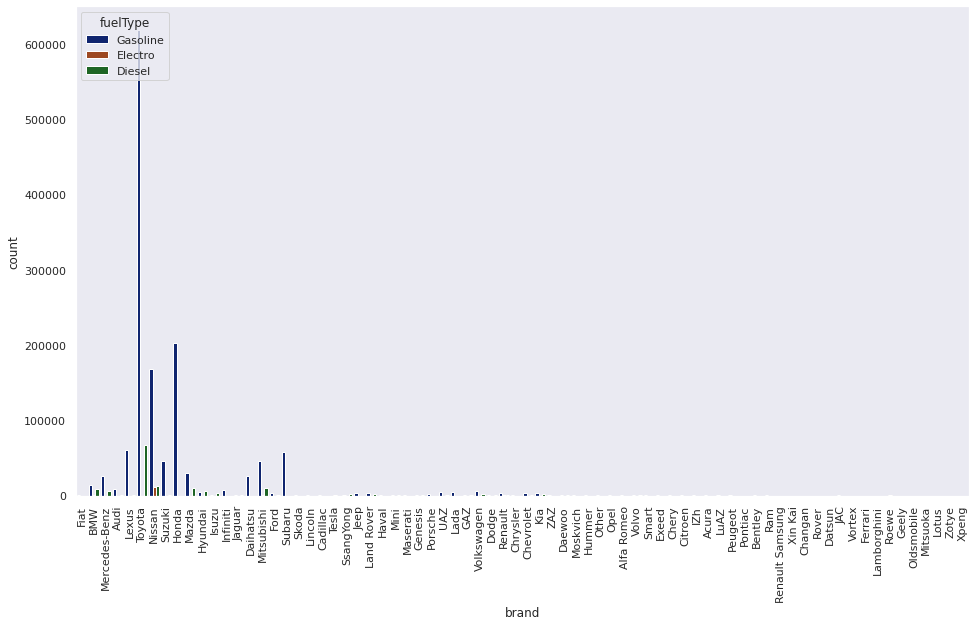

In [84]:
sns.set_palette('dark')
plt.figure(figsize=(16,9))
sns.countplot(x='brand', hue='fuelType', data=df2)
plt.xticks(rotation=90)
plt.show()

In [80]:
df3=df2.copy()
df3

,brand,name,bodyType,color,fuelType,mileage,transmission,power,price
0,Fiat,124 Spider,open,blue,Gasoline,8000.0,Automatic,99.0,1830000
1,BMW,i3,hatchback 5 doors,black,Electro,12000.0,Automatic,99.0,1830000
2,Mercedes-Benz,GLE Coupe,jeep 5 doors,burgundy,Gasoline,57000.0,AT,367.0,4600000
3,Mercedes-Benz,G-Class,jeep 5 doors,black,Gasoline,200000.0,AT,296.0,2999999
4,Audi,Q7,jeep 5 doors,white,Gasoline,67000.0,Automatic,252.0,3300000
...,...,...,...,...,...,...,...,...,...
1513195,Mitsubishi,Pajero,jeep 5 doors,grey,Gasoline,80000.0,AT,245.0,600000
1513196,Daihatsu,Mira e:S,hatchback 5 doors,pink,Gasoline,66000.0,CVT,52.0,430000
1513197,Lexus,GX470,jeep 5 doors,black,Gasoline,170000.0,AT,235.0,1680000
1513198,Nissan,Safari,jeep 5 doors,green,Diesel,313000.0,AT,160.0,999000


In [81]:
#DATA PREPARATION FOR MACHINE LEARNING ALGORITHM BY SPLITTING PRICE AS A VALUE TO BE PREDICTED BY USING THE VALUES WHICH ARE STORED IN VARIABLE X
y=df3.pop('price')
X=df3


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.1,random_state=0)
regressor= LinearRegression()
regressor.fit(X_train,y_train)